# 1. An Introduction to British Premier League

## 1.1 About the league

Football/soccer is one of the most played games in the world. It is played by approximately **250 million** players in over **200 countries and dependencies**, making it the [world's most popular sport.](https://en.wikipedia.org/wiki/Association_football#:~:text=It%20is%20played%20by%20approximately,the%20world's%20most%20popular%20sport.)

The **British/English Premier League** is a soccer/football league of **England**. It is a **Division 1** league which is played among **20 clubs**. It works on a system of **promotion and relegation of clubs** to lower division or to UEFA champions league. The first season of English Premier League was played in February 1992 and since then it has been playing to present days. Currently the **29th Season** of the league is in progress with about 13-14 matches played by each club out of 32 matches.

##### Note: The number of matches and clubs were not the same since the start. These rules were adopted later on

## 1.2 Rules & Regulation

Since our goal is not to comprehend how the league proceed but to analyse the factor or similarity of the pattern among the teams being relegated. We will just take a light overview of the game.

Some of the rules taken from [Premier League Official site](https://www.premierleague.com/premier-league-explained#:~:text=The%20league%20takes%20place%20between,winning%20the%20Premier%20League%20title.) are :
- The league takes place between August and May and involves the teams playing each other home and away across the season, a total of 380 matches.
- Three points are awarded for a win, one point for a draw and none for a defeat, with the team with the most points at the end of the season winning the Premier League title.
- The teams that finish in the bottom three of the league table at the end of the campaign are relegated to the Championship, the second tier of English football.
- Those teams are replaced by three clubs promoted from the Championship; the sides that finish in first and second place and the third via the end-of-season playoffs. 

## 1.3 Description of the Dataset

The Dataset used in the notebook has been obtained from **two sources**.
First is from [kaggle.com](https://www.kaggle.com/egadharmawan/premier-league-standing-all-season-19922020). It is a community for data scientists and machine learning practioner. Anyone can share their dataset with the community. The dataset used in the problem has been extracted and prepared by **Ega Febri Dharmawan**. This dataset has the information of Premier League seasons since 1992-1993 to 2018-2019. Since our goal is to use the data till the present date so the data of the season 2019-2020 and 2020-2021 (which is currently going on) is obtained from [fbref.com](https://fbref.com/en/) which is a football statistics website. The data of the latest 2 seasons have been scraped from there. 

Both of the datasets have been applied with some cleaing steps and after which the data in the pure format has been extracted out. The cleaning steps will be explained in greater depth, later in the section. The final output is the clean and consistent data with the infromation of seasons from 1992-2021.

# 2. Working with Data using Jupyter Notebook

## 2.1 Importing necessary Libraries 

One reason of the python being much famous is python libraries. There are many robust libraries available for data manipulation and handling. The information regarding all the versions of the library has been provided with requirement.txt file attached with the notebook. For data manipulation and handling Numpy version `1.18.3`and Pandas version `0.25.2` are used. For the data visulaization matplotlib version `3.1.1` and seaborn `0.9.0` are used. Some other python packages are also been used such as zipfile, glob and os to help us navigate through the data. The kaggle api is used to directly download the dataset in the notebook

In [1]:
#doing necessary imports
import pandas as pd #if not already installed write "pip install pandas" in conda prompt.
import numpy as np #if not already installed write "pip install numpy" in conda prompt.
import glob #python built-in package
import kaggle ##if not already installed write "pip install kaggle" in conda prompt and paste json file from account in folder
from zipfile import ZipFile #python built-in package
import os #python built-in package
import matplotlib.pyplot as plt #if not already installed write "pip install matplotlib" in conda prompt.
import seaborn as sns #if not already installed write "pip install seaborn" in conda prompt.
%matplotlib inline #notebook magic line to visualize the figures

## 2.2 Downloading the data

As explained earlier. We will acquire the data from kaggle. The dataset has been prepared by **Ega Febri Dharmawan**. This data set only contain information of the season 1992-1993 to 2018-2019. Now we will acquire the data using kaggle api.

In [2]:
#configuring kaggle api
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
api=KaggleApi()
api.authenticate()

In [4]:
api.dataset_download_files("egadharmawan/premier-league-standing-all-season-19922020") #this will return a zip file

In [5]:
zf=ZipFile('premier-league-standing-all-season-19922020.zip') #this finds the zip file
zf.extractall('Dataset/') #to extract the zip file in defined folder
zf.close()

## 2.3 Transformation of data into useable format

In [7]:
all_files = glob.glob("Dataset\Premier League*.csv") #this will look for all files with premier league in name

# Combines all files
all_dataframes = [] # create empty list
for filename in all_files: #we will iterate through one file at a time
    df = pd.read_csv(filename, index_col=None, header=0) #this will read the csv files that are downloaded
    df.columns = ['Position','Club','Played','Won','Drawn','Lost','GF','GA','GD','Points','Season'] #columns names
    all_dataframes.append(df)

# Combine and Sort DataFrames into one clean looking DataFrame
df1 = pd.concat(all_dataframes, axis=0, ignore_index=True, sort=False)
df1 = df1.sort_values(['Season','Position'], ascending=[True, True])

In [8]:
#let us double check if the data has been acquired correctly or not
df1['Season'].unique()

array(['1992/1993', '1993/1994', '1994/1995', '1995/1996', '1996/1997',
       '1997/1998', '1998/1999', '1999/2000', '2000/2001', '2001/2002',
       '2002/2003', '2003/2004', '2004/2005', '2005/2006', '2006/2007',
       '2007/2008', '2008/2009', '2009/2010', '2010/2011', '2011/2012',
       '2012/2013', '2013/2014', '2014/2015', '2015/2016', '2016/2017',
       '2017/2018', '2018/2019', '2019/2020'], dtype=object)

In [9]:
#let us also have a look at clubs that has ever played in premier league
df1['Club'].unique()

array(['Manchester United', 'Aston Villa', 'Norwich City',
       'Blackburn Rovers', 'Queens Park Rangers', 'Liverpool',
       'Sheffield Wednesday', 'Tottenham Hotspur', 'Manchester City',
       'Arsenal', 'Chelsea', 'Wimbledon', 'Everton', 'Sheffield United',
       'Coventry City', 'Ipswich Town', 'Leeds United', 'Southampton',
       'Oldham Athletic', 'Crystal Palace', 'Middlesbrough',
       'Nottingham Forest', 'Newcastle United', 'West Ham United',
       'Swindon Town', 'Leicester City', 'Bolton Wanderers',
       'Derby County', 'Sunderland', 'Barnsley', 'Charlton Athletic',
       'Bradford City', 'Watford', 'WestHam United', 'Fulham',
       'Birmingham City', 'West Bromwich Albion', 'Portsmouth',
       'Wolverhampton Wanderers', 'Wigan Athletic', 'Reading',
       'Stoke City', 'Hull City', 'Burnley', 'Blackpool', 'Swansea City',
       'Cardiff City', 'Bournemouth', 'Brighton and Hove Albion',
       'Huddersfield Town'], dtype=object)

## 2.4 Acquiring and cleaning the Data for season 2019-2020 & 2020-2021

We will now scrap the remaining dataset from [fbref.com](https://fbref.com/en/). Alternatively, we could have scraped the entire data from the same source but since the url for every season are not maintained in a consistent manner, it is easier to just acquire the data from kaggle where the data has already prepared by someone.

In [17]:
#import the remaining data of season 2019-2020 & 2020-2021
df2=pd.read_html('https://fbref.com/en/comps/9/3232/2019-2020-Premier-League-Stats',header=0)[0] #it returns two table we only need the first one
df3=pd.read_html("https://fbref.com/en/comps/9/Premier-League-Stats",header=0)[0] #it returns the data of 2020-2021 season

In [18]:
#looking in what format the data has been called and with which features
df2.head()

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,38,32,3,3,85,33,52,99,71.5,40.0,31.5,0.83,41955,Mohamed Salah - 19,Alisson,→ UEFA Champions League via league finish
1,2,Manchester City,38,26,3,9,102,35,67,81,93.0,34.7,58.3,1.53,37097,Raheem Sterling - 20,Ederson,→ UEFA Champions League via league finish
2,3,Manchester Utd,38,18,12,8,66,36,30,66,59.4,37.4,22.0,0.58,57415,"Marcus Rashford, Anthony Martial - 17",David de Gea,→ UEFA Champions League via league finish
3,4,Chelsea,38,20,6,12,69,54,15,66,66.6,37.9,28.6,0.75,32023,Tammy Abraham - 15,Kepa Arrizabalaga,→ UEFA Champions League via league finish
4,5,Leicester City,38,18,8,12,67,41,26,62,61.6,44.5,17.1,0.45,25312,Jamie Vardy - 23,Kasper Schmeichel,→ UEFA Europa League via league finish


Here we can see that we have some extra features that are not available for previous seasons. In order to keep the workflow consistent we will remove this extra features and stick to the basic ones only.

In [19]:
#let's eliminate those extra features
df2=df2.iloc[:,:10]
df3=df3.iloc[:,:10]

In [20]:
#let's concatenate the 2 DataFrames into one clean looking DataFrame
df_19_21=pd.concat([df2,df3],axis=0)

In [26]:
#to have a look on the teams that have played the the last 2 seasons
df_19_21['Squad'].unique()

array(['Liverpool', 'Manchester City', 'Manchester Utd', 'Chelsea',
       'Leicester City', 'Tottenham', 'Wolves', 'Arsenal',
       'Sheffield Utd', 'Burnley', 'Southampton', 'Everton',
       'Newcastle Utd', 'Crystal Palace', 'Brighton', 'West Ham',
       'Aston Villa', 'Bournemouth', 'Watford', 'Norwich City',
       'Leeds United', 'Fulham', 'West Brom'], dtype=object)

## 2.5 Making the two Datasets consistent

Since the datasets are been extracted from two different sources, there is a great chance that the two must have some uncommon naming of clubs. So we will now look for the clubs that has been noted here with different names but are the same club

In [29]:
#let's make the name of the teams present in the two dataset consistent with each other
counter=0 #to track the location/index of the club name to be corrected
team_names_tobecorrected=[] 
for x in df_19_21['Squad'].unique():
    if not x in df1['Club'].unique():
        team_names_tobecorrected.append(x)
        counter+=1

In [40]:
#to take a look which names need to be corrected
team_names_tobecorrected

['Manchester Utd',
 'Tottenham',
 'Wolves',
 'Sheffield Utd',
 'Newcastle Utd',
 'Brighton',
 'West Ham',
 'West Brom']

In [31]:
#let us write the names of the clubs same as they are present in kaggle dataset 
corrected_names=['Manchester United','Tottenham Hotspur','Wolverhampton Wanderers','Sheffield United','Newcastle United','Brighton and Hove Albion','West Ham United','West Bromwich Albion']

In [32]:
#this will replace the existing club names with the correct or consistent names
df_19_21['Squad'].replace(to_replace=team_names_tobecorrected,value=corrected_names,inplace=True)

In [33]:
#also the kaggle data has additional column that contains the season name information let's add in this DataFrame too
df_19_21['Season']='2019/2020' #this will create new column with values all equal to 2019/2020 
df_19_21['Season'][20:]='2020/2021' #this will correct the season of last 20 instances to 2020/2021

p:\softwares\anaconda\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
#let's make the column name of the two dataset consistent with each other
df_19_21.columns=df1.columns

## 2.6 Finalizing the cleaning and merging the two datasets

In [36]:
#to concatenate the data into one
df=pd.concat([df1,df_19_21])

In [37]:
#it is a good practice to reset the index after application of all cleaning steps
df.reset_index(drop=True)

,Position,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points,Season
0,1,Manchester United,42,24,12,6,67,31,36,84.0,1992/1993
1,2,Aston Villa,42,21,11,10,57,40,17,74.0,1992/1993
2,3,Norwich City,42,21,9,12,61,65,-4,72.0,1992/1993
3,4,Blackburn Rovers,42,20,11,11,68,46,22,71.0,1992/1993
4,5,Queens Park Rangers,42,17,12,13,63,55,8,63.0,1992/1993
...,...,...,...,...,...,...,...,...,...,...,...
601,16,Burnley,13,3,4,6,8,19,-11,13.0,2020/2021
602,17,Brighton and Hove Albion,14,2,6,6,16,22,-6,12.0,2020/2021
603,18,Fulham,14,2,4,8,13,23,-10,10.0,2020/2021
604,19,West Bromwich Albion,14,1,4,9,10,29,-19,7.0,2020/2021


In [38]:
#let's have a final look in dataset
df.head()

,Position,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points,Season
400,1,Manchester United,42,24,12,6,67,31,36,84.0,1992/1993
401,2,Aston Villa,42,21,11,10,57,40,17,74.0,1992/1993
402,3,Norwich City,42,21,9,12,61,65,-4,72.0,1992/1993
403,4,Blackburn Rovers,42,20,11,11,68,46,22,71.0,1992/1993
404,5,Queens Park Rangers,42,17,12,13,63,55,8,63.0,1992/1993


Till now we have acquired and scraped the data from 2 sources. We cleaned the two datasets. Apply transformtion to make them consistent and merge them into one DataFrame. Now we are good to go to visualize the data to gain insights

# 3. Data Visualization

## 3.1 Insights from data
In this part we will analyze the cleaned data and look for the possible insights about the relegated team. We will also visualize some of the factors that may cause the relegation of a team and in the end we will conclude on how to prject if a certain club will relegate or promote to other division.

Our main focus is to analyze the factors that cause a relegation of a club. But we will start from generalized approach and learn some insights about the league first. For this we will answer some questions and discover patterns that are repeated. Also we will look into the teams that end in the top part of the standings table after every season.

#### Objective:
To learn which team has won the most time

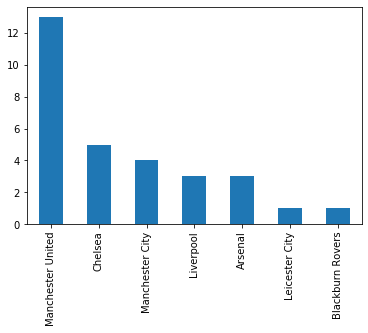

In [46]:
#let's learn which team has won the league the most
most_win=df.loc[df['Position']==1,'Club'].value_counts()
#let's see the result graphically
most_win.plot(kind='bar')

#### Conclusion:
We may conclude that the Manchester United is the best team of all time in Premier league with winning the title 13 times

#### Objective:
Which is the worst performing team

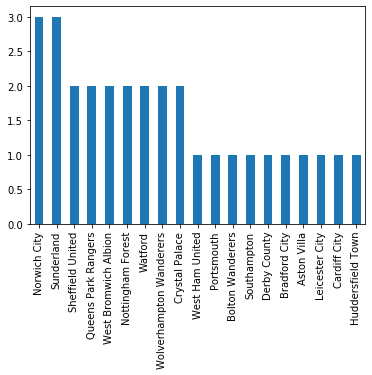

In [47]:
#let's learn which team has end up last in the league the most
most_loss=df.loc[df['Position']==20,'Club'].value_counts()
#let's see the result graphically
most_loss.plot(kind='bar')

#### Conclusion:
Sunderland and Norwich City are the worst performing team of the premier league

#### Objective:
To learn which teams have qualified for the next division the most
##### NOTE: THE TOP  4 TEAMS QUALIFY FOR THE UEFA CHAMPIONS LEAGUE 

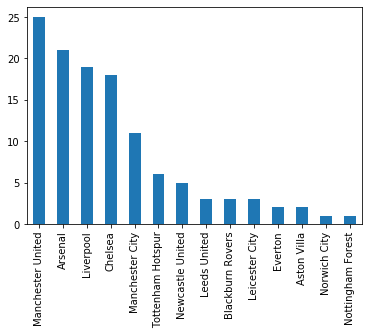

In [52]:
most_ucl=df.loc[df['Position'].between(1,4),'Club'].value_counts()
#to plot the results
most_ucl.plot(kind='bar')

#### Conclusion:
Manchester United, Arsenal Liverpool, Chelsea, Manchester City have qualified 25, 21, 19, 18, 11 times respectively

#### Objective:
To learn which team has relegated the most
##### NOTE: THE LAST 3 TEAMS ARE RELEGATED

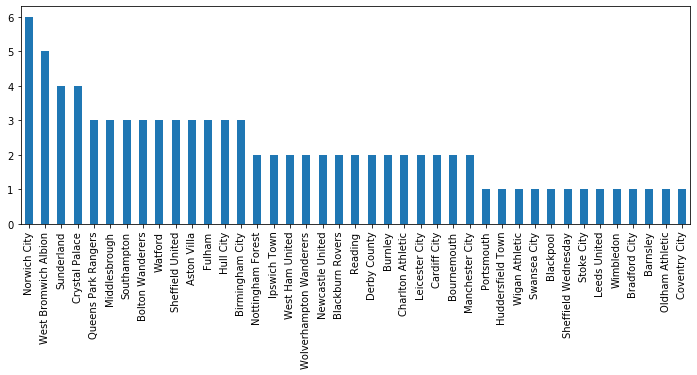

In [57]:
most_relegation=df.loc[df['Position'].between(18,20),'Club'].value_counts()
#plotting results
plt.figure(figsize=(12,4))
most_relegation.plot(kind='bar')

#### Conclusion:
Norwich City has been relegated the most (6 times)

#### Objective:
To learn about the teams that have never been relegated

In [60]:
df['Club'].value_counts().head(8) #this will count every time a unique club shows up

Chelsea              30
Everton              30
Manchester United    30
Arsenal              30
Tottenham Hotspur    30
Liverpool            30
Aston Villa          27
Newcastle United     27
Name: Club, dtype: int64

#### Conclusion:
Chelsea, Everton, Manchester United, Arsenal, Tottenham and Liverpool has never been relegated

## 3.2 Relegation Analysis

In this part we will keep our focus on the relegated teams. We will try to find out patterns or some hidden trend that is common among all the teams that get relegated. We will test one feature at a time. We will generate a null hypothesis and find out if it is true or not. We will dive deep in this section and use statistics to catch the trend. Hopefully by the end, we will be able to predict or project that whether a certain club is close to relegation based on the previous data 